# Introduction

Using Python efficiently means leveraging the enormous number of high quality 3rd party packages developed for data analysis and computation. Today, we'll focus on Numpy and Pandas which supply the linear algebra and tabular dataframe functionality in most Python workflows. As before, if the material that we are covering is too easy or you have seen it before, I encourage you to work to the end of each section to find harder problems that will require more independent investigation. The goal of this notebook is to expose you to a wide range of functionality from both Numpy and Pandas so that you don't have to spend time reinventing the wheel to solve a problem that can already be handled by one of these libraries.

Numpy is the most relevant package for the numerical calculations you'll usually be doing. While it's a Python library, most of its code is actually implemented in C so that it runs faster than pure Python code. There's also a superset of Numpy called Scipy that includes all of the functionality of numpy plus additional scientific computing tools.

Pandas takes the functionality in Numpy arrays and wraps it in metadata, including additional information for tables with easier-to-use indices for columns and rows. It was actually created by a former [Duke student](https://wesmckinney.com/pages/about.html) to fill a void in the Python ecosystem for a tabular data structure.

# Numpy 

Numpy is designed to provide matrix operations and common linear algebra functions which have been specially programmed to be much faster and memory efficient than a naive implementation in native Python. 

## The Numpy `ndarray`

The fundamental data structure in Numpy is the `ndarray`, standing for n-dimensional array. We can easily initialize an array of all zeros and check to see its type:

In [1]:
import numpy as np
all_zero = np.zeros([4,4])
print(all_zero)
print(type(all_zero))

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
<class 'numpy.ndarray'>


An `ndarray` can have arbitrarily many size and elements. We can instantiate a 4 dimensional array filled with ones with the following line:

In [2]:
big_ones = np.ones([4,5,2,2])

These arrays can be thought of as generalizations of vectors or matrices. We represent vectors in Numpy as arrays with a single dimension and matrices are represented as an `ndarray` with two dimensions.

In [3]:
matrix = np.ones([2,2])
vector = np.ones(2)
scalar = np.ones(1)

Note that to call this function, we supplied a sequence of dimension sizes for >1 dimension while we used a single integer to initialize a vector or scalar.

To find the number of elements in the array, we use the `size` attribute. To find the array dimensions, we use `shape`.

In [4]:
another_array = np.ones([10,13,2])
print(another_array.size)
print(another_array.shape)

260
(10, 13, 2)


### Exercise
* Instantiate an `ndarray` of all zeros which has dimensions $3\times 4\times 5$ How many elements in total does it contain?

### `ndarray` internal types

The `ndarray` can store different types of elements and is quite flexible in this regard. These are distinct from the built-in Python numerical types. We can inspect the data type of a Numpy array with the attribute `dtypes`.

In [5]:
# This casts a list of numbers into a Numpy array
array_of_ints = np.asarray([0,1,2])
print(array_of_ints.dtype)

int64


If we wish to convert our array into data type that uses less space, we can convert it into a lower precision data type. In this next code cell, the keyword argument `dtype='float64'` tells Numpy to create the array with a floating point number that uses 64 bits to represent each number. To check the size of a Numpy array in memory, we can use the `nbytes` attribute.

In [6]:
array_in_64_bits = np.ones([100,100],dtype='float64')
print(array_in_64_bits.nbytes)

80000


In [7]:
array_in_32_bits = array_in_64_bits.astype('float32')
print(array_in_32_bits.nbytes)

40000


Arrays of strings are also possible. Depending on the length of the string, the internal datatype may be an 8 byte unicode (`<U8`) or some other longer length.

In [8]:
string_ndarray = np.asarray(['cat','dog','parakeet'])
print(string_ndarray.dtype)

<U8


When Numpy can't identify a consistent internal type across its elements or finds a type that it is not familiar with, it will default to `object`.

In [9]:
def a_function():
    return

weird_array = np.asarray([a_function,22])
print(weird_array.dtype)

object


### Exercises

* Numpy has an internal data type for dates / times. Read the documentation available [here](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html) and create a Numpy array of datetimes that represents the last 30 days.
* Use datetime objects in conjunction with the basic Python arithmetic operator `-` to determine the number of days since January 1, 2000.
* A business day is a day of the week on which most businesses are expected to be open. Calculate the number of business days in 2019 using Numpy datetimes. There is a function described in the documentation that should make this easier.

## Multidimensional indexing and slicing

Since Numpy the `ndarray` can have multiple axes or dimensions, we need to know how to access subsets of these values. For an array of shape $n_1 \times n_2 ,...,n_p$, we can access the subarray by using square brackets and multiple slices.

In [10]:
# Creates 10 x 10 x 10 x 10 array of randomly sampled
# values from a standard normal distribution.
original = np.random.randn(10,10,10,10)
subset = original [0:2,0:2,0:3,0:4]
print(subset.shape)

(2, 2, 3, 4)


Note that sequentially accessing the array with multiple square brackets will give you something, but it won't be what you were expecting.

In [11]:
another_subset = original[0:2][0:2][0:3][0:4]
print(another_subset.shape)

(2, 10, 10, 10)


### Exercise
* Given some `ndarray` X with 4 dimensions, how would you index into it such that you retrieved every element from the first axis or dimension, the second element from the second axis, and so on? 


## Matrix arithmetic and linear algebra

For `ndarray`s with appropriate shapes and dimensions, we can easily perform elementwise operations. Linear algebra functions are also included. Remember that the `*` operator yields elementwise multiplication in Numpy instead of the matrix product. In Python 3, the character `@` is reserved for matrix multiplication. The `dot` method is also available for `ndarray`s for the matrix product.

In [12]:
A = np.asarray([[1,2],[0,1]])
B = np.asarray([[1,0],[2,1]])
print(A)
print(B)
print('sum:\n', A+B)
print('dot product:\n',A@B)

[[1 2]
 [0 1]]
[[1 0]
 [2 1]]
sum:
 [[2 2]
 [2 2]]
dot product:
 [[5 2]
 [2 1]]


## Reshaping and axis swapping

You can reshape a matrix given that the number of elements is unchanged.

In [13]:
a_long_vector = np.asarray(range(30))
as_matrix = a_long_vector.reshape(5,6)
print(as_matrix.shape)

(5, 6)


The order used to rearrange the elements either starts from the first axis / dimension or from the last dimension, depending on whether you use a keyword argument to `reshape`.

In [14]:
another_matrix = a_long_vector.reshape(5,6,order='F')
print(as_matrix)
print('\n',another_matrix)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]

 [[ 0  5 10 15 20 25]
 [ 1  6 11 16 21 26]
 [ 2  7 12 17 22 27]
 [ 3  8 13 18 23 28]
 [ 4  9 14 19 24 29]]


The matrix transpose operation is available and is also generalized to more than 2 axes with the `swapaxes` function. Note that the axis ordering starts at zero!

In [15]:
transposed = as_matrix.T
swapped = np.swapaxes(as_matrix,0,1)
transposed == swapped

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

### Exercise
* Given an `ndarray` defined by `X = np.ones([2,3,4,5,6])`, reshape `X` so that it has dimensions of $3 \times 2 \times 6 \times 4 \times 5$. The documentation at https://docs.scipy.org/doc/numpy/reference/generated/numpy.moveaxis.html may be helpful.

## Concatenating and broadcasting

Concatening two arrays involves combining them along all axes for which they have the same size. This is how we can create a 'tall' table out of two shorter ones.

In [16]:
A = np.empty([5,5])
B = np.empty([3,5])
C = np.concatenate([A,B],axis=0)
print(C.shape)

D = np.empty([6,2])
E = np.empty([6,1])
F = np.concatenate([E,D],axis=1)
print(F.shape)

(8, 5)
(6, 3)


Broadcasting is a very flexible and powerful way to combine Numpy arrays of different shapes in a way that can make many computations much easier to write. The basic idea of broadcasting is that if you ask Numpy to perform operations with arrays that have mismatched dimensions, it will try to repeat or tile some of the arrays along certain axes so that the result can be calculated.

For example, if I try to add a 1-dimensional vector to a 2-D matrix, what we see is that the vector is added to each row of the matrix.

In [17]:
x = np.asarray([1,3])
A = np.asarray([[1,0],[0,2]])
x+A

array([[2, 3],
       [1, 5]])

You can read more about broadcasting [here](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). Broadcasting works only when the broadcasted axis has size 1 or is missing altogether. A handy trick to add a new dimension to an array quickly is `newaxis`.

In [18]:
y = np.ones([5])
print(y.shape)
print(y[:,np.newaxis].shape)

(5,)
(5, 1)


The outer product of two vectors yields a matrix and is straightforward to compute with broadcasting.

In [19]:
a = np.arange(3)
b = np.arange(4)
outer = a[:,np.newaxis] * b[np.newaxis,:]

In [20]:
outer

array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6]])

### Exercises
* All square matrices can be decomposed into a sum over outer products of their eigenvectors with the formula $A = \sum_i \lambda_i u_i u_i^T$ where $\lambda_i$ denotes the i-th eigenvalue and $u_i$ denotes the i-th eigenvector. Write a function that takes in a list of eigenvalues and a list of eigenvectors to return the matrix $A$. You can test out the function `np.linalg.eig`.
* Use broadcasting and swapaxes to add together an array with shape `(1,3,2,1)` and an array with shape `(2,3)`.

## Axis arguments

Numpy has many functions which aggregate some of the dimensions of an array. For example, the `sum` function can be used to compute the sum over all or just a few axes of an array. These functions all take in an `axis` keyword to indicate which dimensions the operations should be taken over.

In [21]:
outer.sum()

18

In [22]:
outer.sum(axis=0)

array([0, 3, 6, 9])

In [23]:
outer.sum(axis=1)

array([ 0,  6, 12])

### Exercises
* Create the matrix $X$ with dimensions $n\times p$ using the command `X = np.random.randn(100,5)`.
* Compute the sample covariance matrix $\hat{\Sigma}$ by following these steps. First, subtract the per-column mean from each of the columns using a combination of `np.mean` and broadcasting. This resulting matrix $Y$ has been *centered* since its fields are zero-mean. Second, take the matrix product of the centered matrix with itself according to the formula $Y^TY$. This is the sample covariance matrix. Can you interpret the meaning of its values?
* Integrate the code from the preceding question to define a function that performs principal components analysis on $X$. This requires computing the sample covariance matrix, taking its eigendecomposition (accomplished with `np.linalg.eig`) and projecting the original data $X$ onto the matrix of eigenvectors. Implement PCA as a function which takes in a matrix $X$ and the number of prinicipal components $k$.

### Bonus exercises
* A shortcoming of PCA as presented so far is that it is not immediately clear how many components to use. Modify your function from the previous exercise to use a fraction-of-variance threshold rather than the user supplied parameter $k$ to determine how many components should be used in the new coordinate system. Note that the variance provided by each component is just the square of its eigenvalue, normalized by the sum of all squared eigenvalues. A threshold of 90% means to include all the eigenvalues whose sum-of-squares is less than 0.9, after the eigenvalues have been sorted by absolute value.
* In a previous lecture we saw how to apply minibatched maximum likelihood estimation to estimating the mean of a multivariate normal distribution with a known covariance matrix. That procedure required being able to calculate the score function $\nabla_{\theta}L$. For complex models, even this may be too hard to write down by hand. Use the `autograd` package (documented [here](https://github.com/HIPS/autograd)) to automatically calculate this gradient function and implement minibatched MLE for mean $\mu$ of the the multivariate normal in 2 dimensions with an identity covariance matrix. In order to draw samples from the MVN for testing, use `np.random.multivariate_normal`. For a given tolerance $\epsilon=0.001$, record how many iterations it takes the estimator to converge from an initial mean estimate of $(1.0,1.0)$ to a true mean of $(0.0,0.0)$. 

# Pandas

## Using `pandas`

There are lots of excellent third party libraries for Python data analysis and `pandas` is one of the most used. `pandas` is designed around the `Dataframe`, a data structure which has a table of values along with methods for easily selecting subsets of records as well as doing computation. Let's use `pandas` to import the file.

## Dataframe basics

In [24]:
import pandas as pd
filepath = '../datasets/heart.csv'
dataframe = pd.read_csv(filepath)

We can see how many rows and columns are in the dataframe.

In [25]:
dataframe.shape

(303, 14)

We can also look at the first few records.

In [26]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Pandas makes it really easy to get summary statistics in a readable format.

In [42]:
dataframe.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

### Exercises

* The `sex` variable is coded as 1 for male, 0 for female (more information about the dataset is available at https://archive.ics.uci.edu/ml/datasets/heart+Disease). What is your interpretation of the mean of the `sex` column?

* Write a function that extracts the range of each column using `.min()` and `.max()` methods for the dataframe.

We can think of `pandas` as a sort of wrapper around a `numpy` array with metadata for rows and columns. `numpy` provides the array and linear algebra functionality that users of MATLAB are very familiar with. To extract the underlying array from a `pandas` dataframe, we can use the `values` attribute.

In [27]:
dataframe.values

array([[ 63.,   1.,   3., ...,   0.,   1.,   1.],
       [ 37.,   1.,   2., ...,   0.,   2.,   1.],
       [ 41.,   0.,   1., ...,   0.,   2.,   1.],
       ..., 
       [ 68.,   1.,   0., ...,   2.,   3.,   0.],
       [ 57.,   1.,   0., ...,   1.,   3.,   0.],
       [ 57.,   0.,   1., ...,   1.,   2.,   0.]])

Note that the first column of the dataframe isn't shown in the `numpy` array. That column is an index column kept by the dataframe which must have unique values for every row of the dataframe. We can use the index to select values using the `.loc` method.

In [28]:
dataframe.loc[2]

age          41.0
sex           0.0
cp            1.0
trestbps    130.0
chol        204.0
fbs           0.0
restecg       0.0
thalach     172.0
exang         0.0
oldpeak       1.4
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 2, dtype: float64

We can also select by the order of the rows as well using the `iloc` method. However, in this dataset, using `.loc` and `.iloc` are interchangeable because the default index that `pandas` assigned on import is an integer index starting at 0. To view the columns, we just use the square brackets.

In [29]:
dataframe['age'].head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

## Plotting

A really handy tool is the pair plot from the package `seaborn` It shows all of the pairwise scatter plots in which the values from one column are plotted against the other. The plots on the diagonal show the marginal distribution of each random variable. Which variables appear to be correlated?

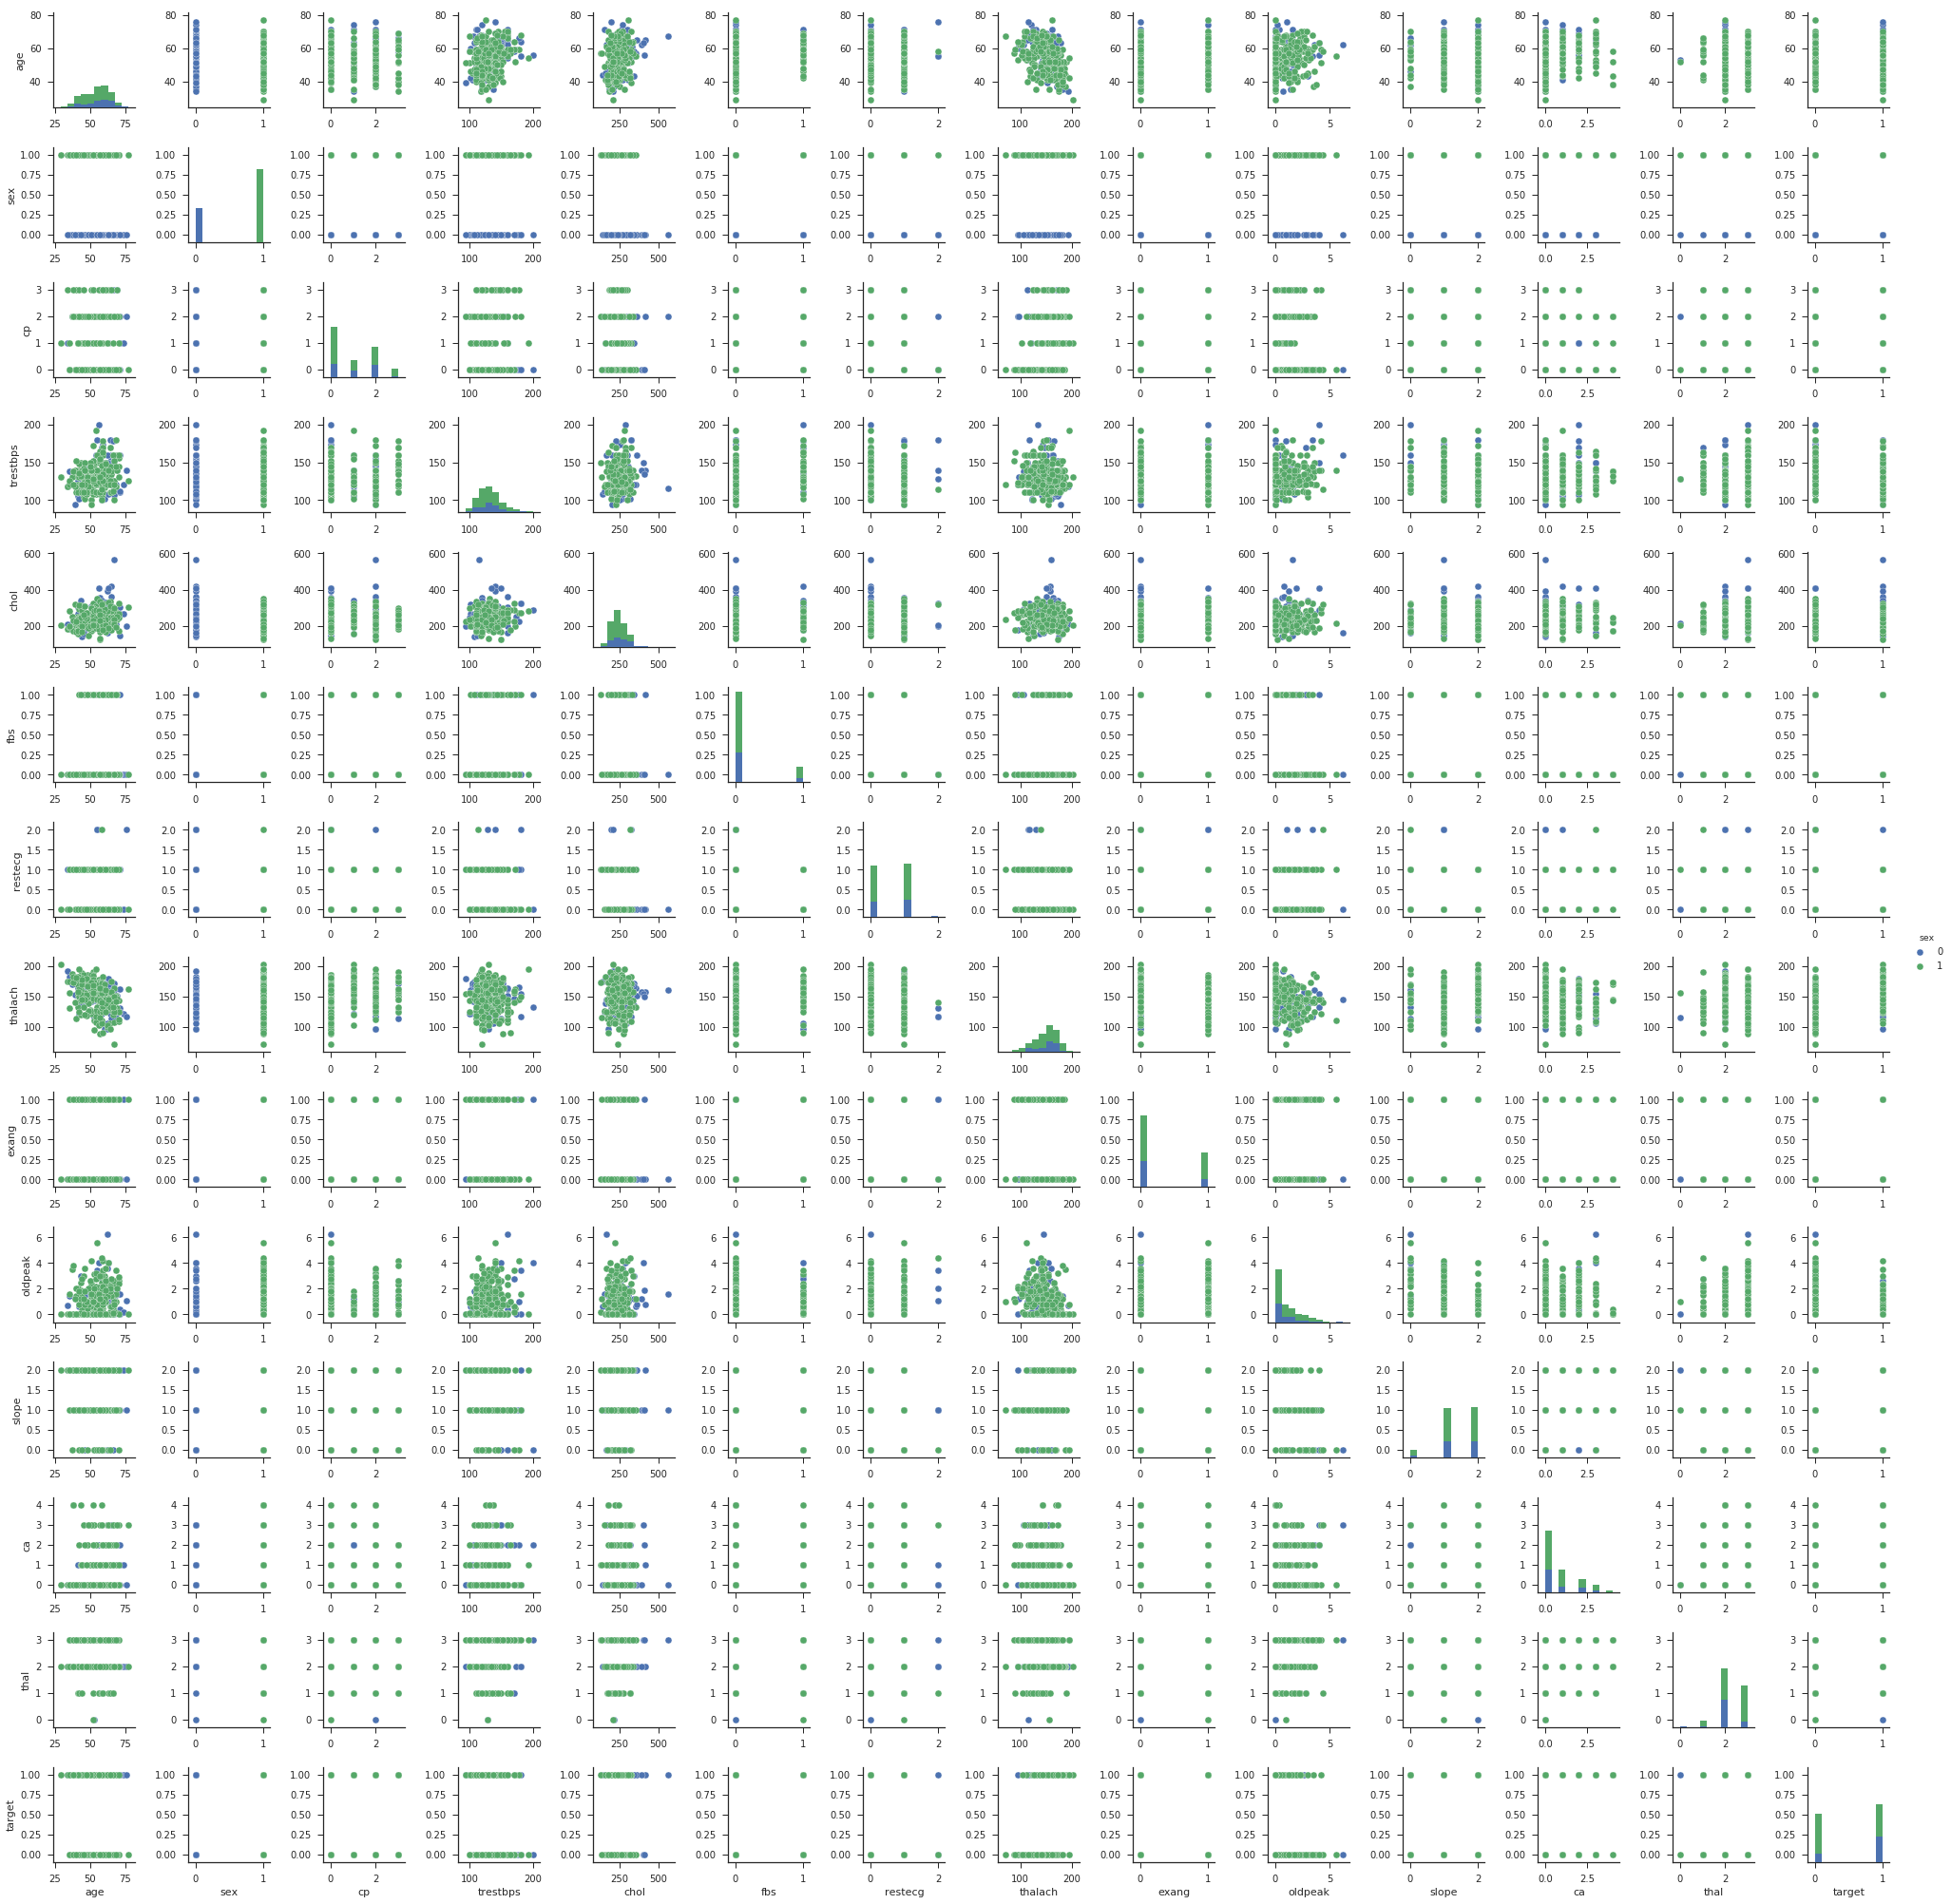

In [30]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
sns.pairplot(dataframe, hue="sex",size=2)

This scatter plot is hard to read because it covers too many columns or fields. Let's extract a subset of these and regenerate the plot.

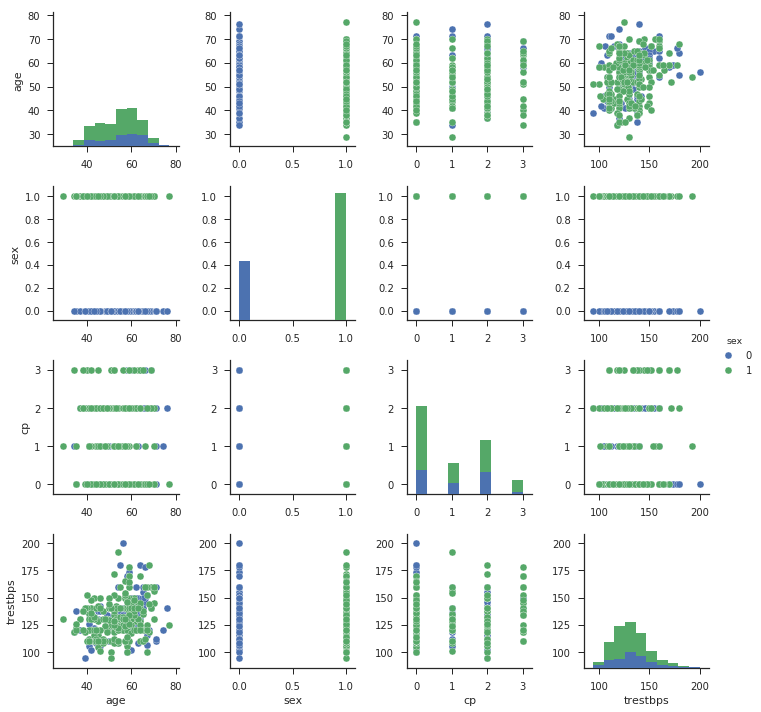

In [36]:
subset_columns = dataframe.columns[0:4]
subset_dataframe = dataframe[subset_columns]
sns.pairplot(subset_dataframe,hue='sex')

Seaborn is really a high-level wrapper for another plotting library, Matplotlib. We'll discuss more details about Matplotlib in another lecture but for now we'll use it to visualize data coming out of a pandas dataframe.

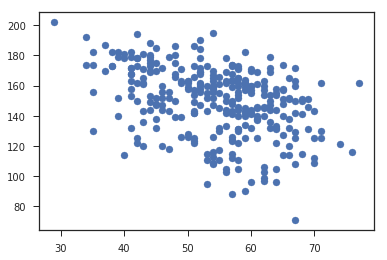

In [31]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['age'],dataframe['thalach'])

Customizing a plot is typically done with calls to `pyplot`. Here's the same plot with a range of different formatting options applied. `plt.gca()` returns the current active plot.

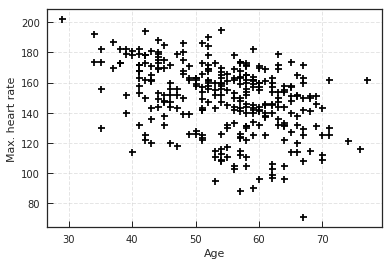

In [32]:
plt.scatter(dataframe['age'],dataframe['thalach'],marker='+',color='k')
plt.gca().tick_params(direction='in')
plt.xlabel('Age')
plt.ylabel('Max. heart rate')
plt.grid('on',linestyle='--',alpha=0.5)

The Seaborn package even has the ability to generate a plot with a linear regression!

We can check the correlations numerically with the `corr` method of our dataframe

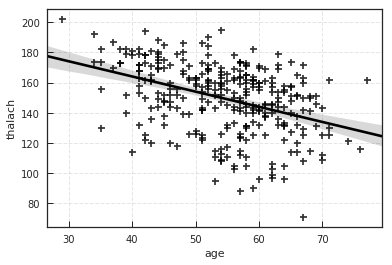

In [41]:
sns.regplot('age','thalach',data=dataframe,color='k',marker='+')
plt.grid('on',linestyle='--',alpha=0.5)
plt.gca().tick_params(direction='in')


In [33]:
correlations = dataframe.corr()
correlations

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Looking at a table of raw numbers is hard. Let's put this into a graphical format. For more information about this dataset, you can see the description at https://www.kaggle.com/ronitf/heart-disease-uci.

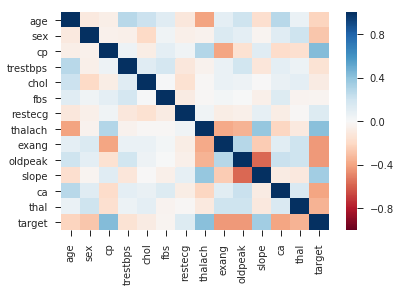

In [34]:
sns.heatmap(correlations,vmin=-1,vmax=1,cmap='RdBu')

### Exercises
* Interpret the correlation plot above. Which factors seem to be most strongly correlated or anti-correlated?
* Use the code you developed earlier for principal components analysis to perform PCA on this dataset with $k=2$. Then, make a plot of the transformed data in 2D using `plt.scatter`.